# Deep Learning
# DL09-Kernel

## <font color='blue'>**Convoluciones**</font>
<p style='text-align: justify;'>

Cuando tenemos arreglos multidimensionales, distintos canales como en imagenes color. Estas propiedades no se aprovechan cuando se aplica una transformación afín; de hecho, todos los ejes se tratan de la misma forma y no se tiene en cuenta la información topológica. Aún así, aprovechar la estructura implícita de los datos puede resultar muy útil para resolver algunas tareas, como la visión por computadora y el reconocimiento de voz, y en estos casos sería mejor preservarlo. Aquí es donde entran en juego las circunvoluciones discretas.

Una convolución discreta es una transformación lineal que conserva esta noción de ordenamiento en la información. Es escasa (solo unas pocas unidades de entrada contribuyen a una unidad de salida determinada) y reutiliza los parámetros (se aplican los mismos pesos a varias ubicaciones en la entrada).

El **kernel**  se desliza por el mapa de características de entrada. En cada ubicación, se calcula el producto entre cada elemento del kernel y el elemento de entrada que superpone y los resultados se suman para obtener la salida en la ubicación actual. La convolución que se muestra en la figura  es un ejemplo de una convolución 2-D, pero puede generalizarse a convoluciones N-D. Por ejemplo, en una convolución 3-D, el **kernel** sería un cuboide y se deslizaría a lo largo de la altura, el ancho y la profundidad del mapa de características de entrada.

![Convolucion](https://drive.google.com/uc?export=view&id=1SVRk5jwmBM_g_JhWgDUEbsc1B5k7oyVM)

Existen 4 propiedades importantes para la configuración de una convolución.

1. El tamaño de entrada (Las dimension de la imagen por ejemplo).
2. El tamaño del kernel.
3. El stride.
4. El padding.
Calculo de kernel con padding. 
![Padding](https://drive.google.com/uc?export=view&id=1j_O-TPUYWZpAi7M7XtSj2qN9QbXEXibk)



## <font color='blue'>**Pooling**</font>
<p style='text-align: justify;'>

Además de las convoluciones discretas en sí mismas, las operaciones de agrupación constituyen otro componente importante en las CNN. Las operaciones de agrupación reducen el tamaño de los mapas de características mediante el uso de alguna función para resumir subregiones, como tomar el valor promedio o máximo.

El pooling funciona deslizando una ventana a través de la entrada y alimentando el contenido de la ventana a una función de agrupación. En cierto sentido, la agrupación funciona de manera muy similar a una convolución discreta, pero reemplaza la combinación lineal descrita por el kernel con alguna otra función. Las figuras siguientes proporcionan un ejemplo de agrupación promedio, y  agrupación máxima respectivamente.

Ejemplo de averagepooling
![AveragePooling](https://drive.google.com/uc?export=view&id=1p94IB34ZjPIhm_8o15NhcKJnokV6k8gA)

Ejemplo de MAxpooling
![MaxPooling](https://drive.google.com/uc?export=view&id=1a-EaOnFuuc_y2PcAprmSfQl9B8sDneKb)



## <font color='blue'>**Convolución transpuesta**</font>
<p style='text-align: justify;'>

La necesidad de convoluciones transpuestas generalmente surge del deseo de utilizar una transformación que vaya en la dirección opuesta a una convolución normal, es decir, de algo que tiene la forma de la salida de alguna convolución a algo que tiene la forma de su entrada mientras se mantiene una patrón de conectividad que sea compatible con dicha convolución. Por ejemplo, se podría utilizar una transformación como la capa de decodificación de un codificador automático convolucional o para proyectar mapas de características a un espacio de mayor dimensión.


En las convoluciones transpuestas tenemos pesos que se aprenden aprendemos a través del back-propagation.

![Transposed](https://drive.google.com/uc?export=view&id=1OCxHG8ylPy4q68EeaB567IAPxGrRyDSQ) 

### Creemos un filtro. 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


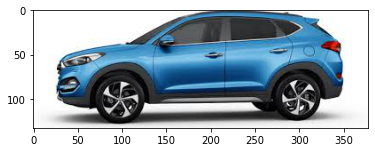

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Leamos la imagen
image = mpimg.imread('/content/drive/MyDrive/07_DeepLearning/files/Auto.jfif')
#image = mpimg.imread('D:/Telefonica/RedesNeuronales/images/Auto.jfif')

plt.imshow(image)

### Convert the image to grayscale

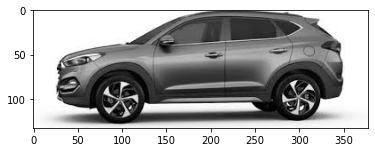

In [3]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

### Creemos un kernel.

A continuación, se le ha dado un tipo común de filtro de detección de bordes: un operador Sobel.

El filtro Sobel se usa muy comúnmente en la detección de bordes y en la búsqueda de patrones de intensidad en una imagen. Aplicar un filtro Sobel a una imagen es una forma de **tomar (una aproximación) de la derivada de la imagen** en la dirección x o y, por separado. Los operadores se ven de la siguiente manera.

![Sobel](https://drive.google.com/uc?export=view&id=1B1aTXYSDjSjkTMESxNC1sEDYuas0RwRp) 

Definamos un operador de Sobel.

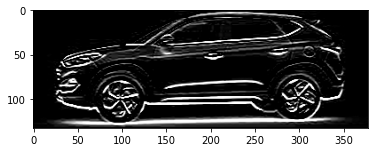

In [4]:
# Definamos el kernel 3x3. 
sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])

##  Apliquemoslo a la imagen. 

# Utilizamos el metodos filter2D para aplicar el operador. 
filtered_image = cv2.filter2D(gray, -1, sobel_y)

plt.imshow(filtered_image, cmap='gray')

Se observan los bordes con la imagen del auto en blanco. Probemos con el sobel_x

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


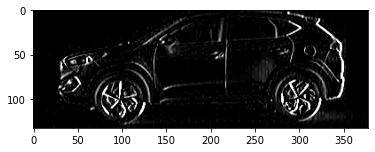

In [6]:
# Definamos el kernel 3x3. 
sobel_x = sobel_y.T
print(sobel_x)

##  Apliquemoslo a la imagen. 

# Utilizamos el metodos filter2D para aplicar el operador. 
filtered_image = cv2.filter2D(gray, -1, sobel_x)

plt.imshow(filtered_image, cmap='gray')